In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# EDA

### Loading the data

In [3]:
# specifying data types for the columns to maintain formatting from original data
data_types = {
    'hospital_service_area': object, 
    'hospital_county': object,
    'operating_certificate_number': object, 
    'permanent_facility_id': object,
    'facility_name': object, 
    'age_group': object, 
    'zip_code_3_digits': object, 
    'gender': object, 
    'race': object,
    'ethnicity': object, 
    'payment_typology_1': object, 
    'payment_typology_2': object,
    'payment_typology_3': object, 
    'length_of_stay': int
}

In [4]:
all_visits = pd.read_csv('data/planned_deliveries.csv', dtype=data_types)
all_visits = all_visits.loc[:, all_visits.columns != 'Unnamed: 0']

In [5]:
all_visits_with_nans = all_visits

In [6]:
all_visits_with_nans

,hospital_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,payment_typology_1,payment_typology_2,payment_typology_3,length_of_stay
0,New York City,Manhattan,7002024,001456,Mount Sinai Hospital,30 to 49,100,F,Other Race,Not Span/Hispanic,Private Health Insurance,Self-Pay,NaN,3
1,New York City,Queens,7003000,001626,Elmhurst Hospital Center,30 to 49,113,F,Other Race,Spanish/Hispanic,Medicaid,NaN,NaN,3
2,New York City,Bronx,7000008,001172,Lincoln Medical & Mental Health Center,18 to 29,100,F,Other Race,Spanish/Hispanic,Medicaid,NaN,NaN,2
3,New York City,Kings,7001009,001294,Coney Island Hospital,30 to 49,112,F,Other Race,Spanish/Hispanic,Medicaid,NaN,NaN,2
4,New York City,Manhattan,7002009,001445,Harlem Hospital Center,18 to 29,100,F,Black/African American,Not Span/Hispanic,Medicaid,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,New York City,Kings,7001020,001305,Maimonides Medical Center,30 to 49,112,F,White,Not Span/Hispanic,Private Health Insurance,Medicaid,Self-Pay,3
18800,New York City,Bronx,7000002,001186,North Central Bronx Hospital,30 to 49,104,F,Other Race,Spanish/Hispanic,Medicaid,NaN,NaN,1
18801,New York City,Manhattan,7002024,001456,Mount Sinai Hospital,30 to 49,100,F,White,Not Span/Hispanic,Private Health Insurance,Self-Pay,NaN,3
18802,New York City,Manhattan,7002021,001454,Metropolitan Hospital Center,30 to 49,100,F,Other Race,Spanish/Hispanic,Medicaid,NaN,NaN,2


In [7]:
rows, cols = all_visits.shape
print('This dataset has:')
print('Rows:', rows)
print('Cols:', cols)

This dataset has:
Rows: 18804
Cols: 14


### Exploring columns & their data types

In [8]:
all_visits.columns

Index(['hospital_service_area', 'hospital_county',
       'operating_certificate_number', 'permanent_facility_id',
       'facility_name', 'age_group', 'zip_code_3_digits', 'gender', 'race',
       'ethnicity', 'payment_typology_1', 'payment_typology_2',
       'payment_typology_3', 'length_of_stay'],
      dtype='object')

In [9]:
all_visits.dtypes

hospital_service_area           object
hospital_county                 object
operating_certificate_number    object
permanent_facility_id           object
facility_name                   object
age_group                       object
zip_code_3_digits               object
gender                          object
race                            object
ethnicity                       object
payment_typology_1              object
payment_typology_2              object
payment_typology_3              object
length_of_stay                   int32
dtype: object

In [10]:
# creating data dictionary
# for col in all_visits.columns:
#     print(col.upper())
#     for x in all_visits[col].unique():
#         print(f'\t\t{x}')
#     print('-------------------------------')

### Exploring the target variable: length_of_stay

In [55]:
pd.value_counts(all_visits['length_of_stay']).reindex([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17])

length_of_stay
1     2755
2     9524
3     5039
4     1154
5      252
6       50
7       15
8        6
9        2
10       1
11       1
12       1
13       1
14       2
17       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Length of Stay for an On-Time Delivery')

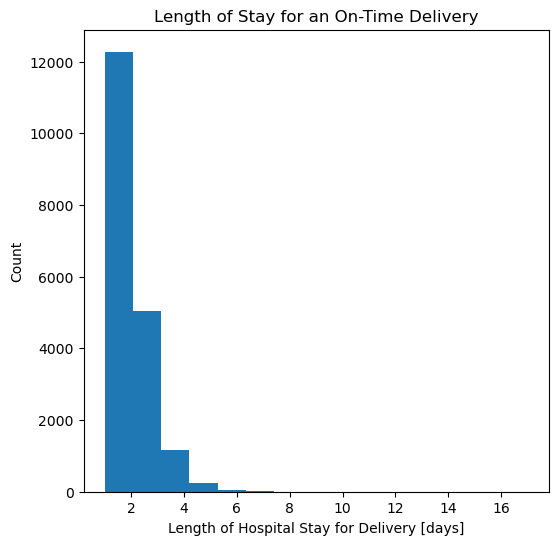

In [12]:
plt.figure(figsize=(6, 6))
all_visits['length_of_stay'].plot.hist(bins=all_visits['length_of_stay'].nunique())
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Count')
plt.title('Length of Stay for an On-Time Delivery')

Text(0.5, 1.0, 'Length of Stay for an On-Time Delivery')

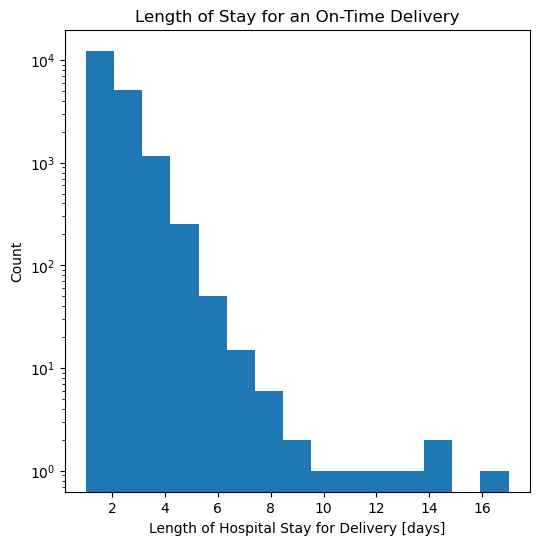

In [13]:
plt.figure(figsize=(6, 6))
all_visits['length_of_stay'].plot.hist(log=True, bins=all_visits['length_of_stay'].nunique())
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Count')
plt.title('Length of Stay for an On-Time Delivery')

## REPLACING MISSING VALUES WITH A SEPARATE CATEGORY FOR CATEGORICAL FEATURES

In [14]:
all_visits['payment_typology_2'].unique()

array(['Self-Pay', nan, 'Medicaid', 'Private Health Insurance',
       'Medicare', 'Blue Cross/Blue Shield', 'Managed Care, Unspecified',
       'Miscellaneous/Other', 'Federal/State/Local/VA'], dtype=object)

In [15]:
all_visits = all_visits.replace(to_replace=float('nan'), value='NOT REPORTED')

In [16]:
all_visits['payment_typology_2'].unique()

array(['Self-Pay', 'NOT REPORTED', 'Medicaid', 'Private Health Insurance',
       'Medicare', 'Blue Cross/Blue Shield', 'Managed Care, Unspecified',
       'Miscellaneous/Other', 'Federal/State/Local/VA'], dtype=object)

## Exploring the features

#### hospital_service_area

In [56]:
len(all_visits['hospital_service_area'].unique())

9

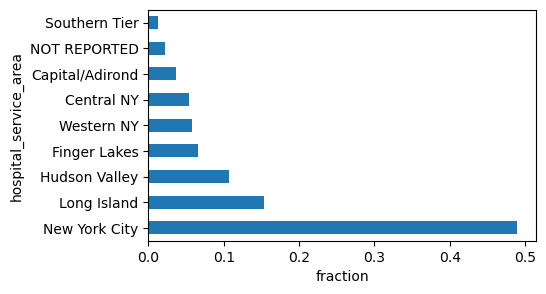

In [17]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['hospital_service_area'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

This makes sense knowing that NYC contains the largest percentage of the NY population.

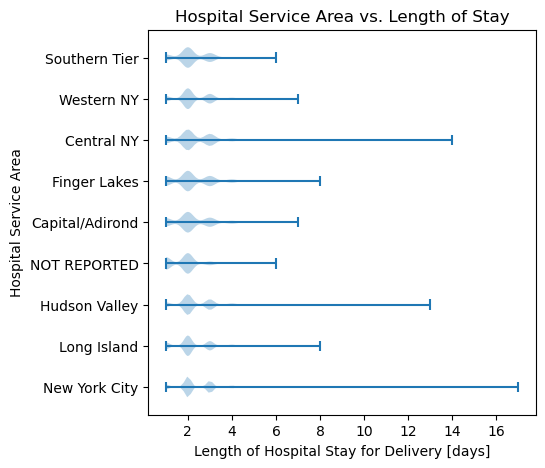

In [18]:
non_na = all_visits.dropna(subset='hospital_service_area')
labels = non_na['hospital_service_area'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['hospital_service_area']==unique]['length_of_stay'].values)
plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.ylabel('Hospital Service Area')
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.title('Hospital Service Area vs. Length of Stay')
plt.show()

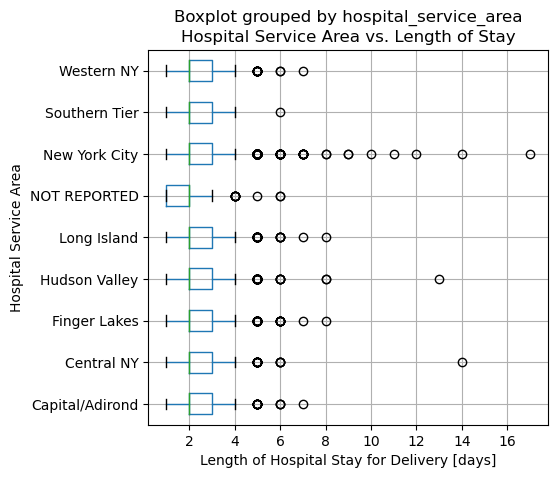

In [19]:
non_na = all_visits.dropna(subset='hospital_service_area')
non_na[['hospital_service_area', 'length_of_stay']].boxplot(by='hospital_service_area', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Hospital Service Area')
plt.title('Hospital Service Area vs. Length of Stay')
plt.show()

#### hospital_county

In [57]:
len(all_visits['hospital_county'].unique())

49

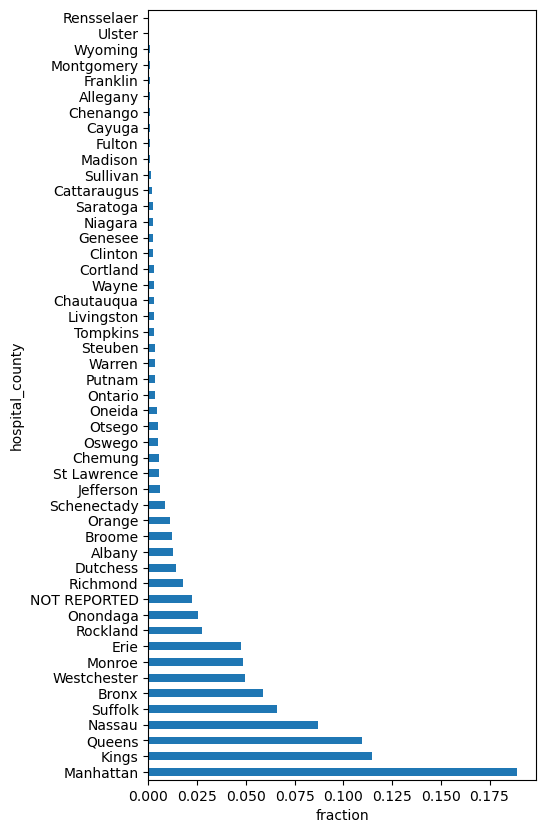

In [20]:
plt.figure(figsize=(5, 10))
pd.value_counts(all_visits['hospital_county'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

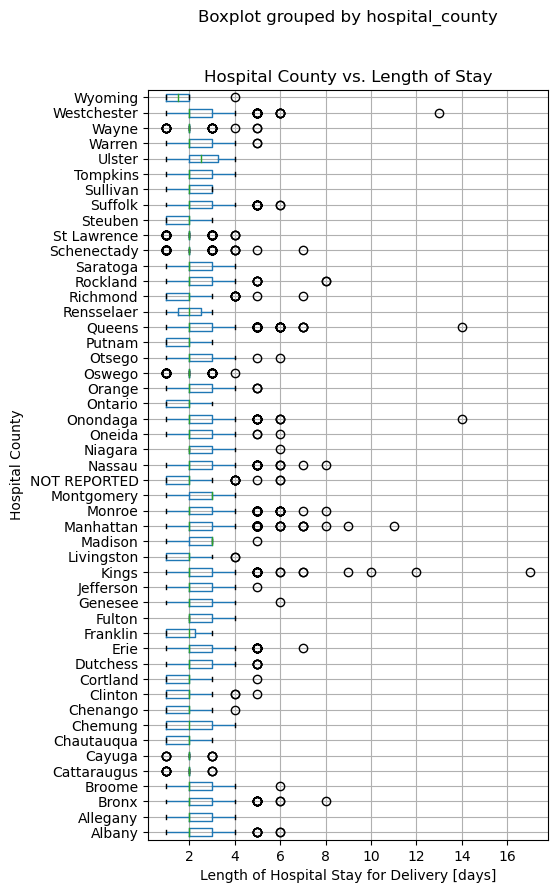

In [21]:
non_na = all_visits.dropna(subset='hospital_county')
non_na[['hospital_county', 'length_of_stay']].boxplot(by='hospital_county', vert=False, figsize=(5, 10))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Hospital County')
plt.title('Hospital County vs. Length of Stay')
plt.show()

#### operating_certificate_number

In [58]:
len(all_visits['operating_certificate_number'].unique())

112

In [22]:
# plt.figure(figsize=(5, 20))
# pd.value_counts(all_visits['operating_certificate_number'],normalize=True).plot.barh()
# plt.xlabel('fraction')
# plt.show()

#### permanent_facility_id

In [59]:
len(all_visits['permanent_facility_id'].unique())

121

In [23]:
# plt.figure(figsize=(5, 20))
# pd.value_counts(all_visits['permanent_facility_id'],normalize=True).plot.barh()
# plt.xlabel('fraction')
# plt.show()

#### facility_name

In [60]:
len(all_visits['facility_name'].unique())

121

In [24]:
# plt.figure(figsize=(5, 20))
# pd.value_counts(all_visits['facility_name'],normalize=True).plot.barh()
# plt.xlabel('fraction')
# plt.show()

#### age_group

In [25]:
age_group_correct_order = ['0 to 17', '18 to 29', '30 to 49', '50 to 69']

In [26]:
pd.value_counts(all_visits['age_group']).reindex(age_group_correct_order)

age_group
0 to 17       142
18 to 29     7915
30 to 49    10746
50 to 69        1
Name: count, dtype: int64

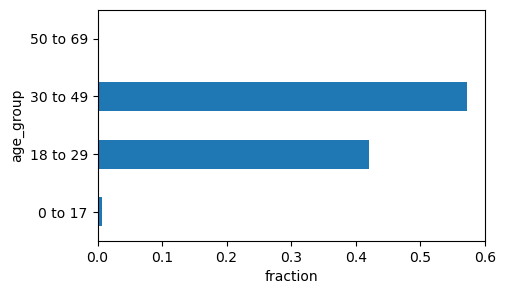

In [27]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['age_group'],normalize=True).reindex(age_group_correct_order).plot.barh()
plt.xlabel('fraction')
plt.show()

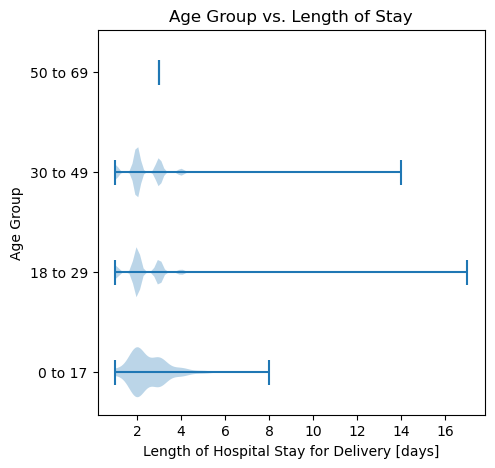

In [28]:
non_na = all_visits.dropna(subset='age_group')
labels = ['0 to 17', '18 to 29', '30 to 49', '50 to 69']
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['age_group']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Age Group')
plt.title('Age Group vs. Length of Stay')
plt.show()

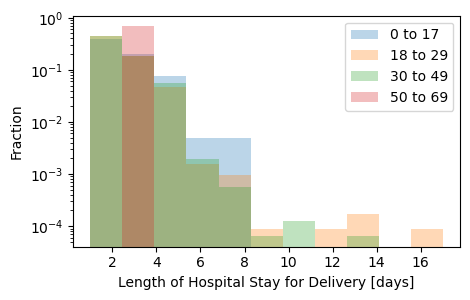

In [29]:
non_na = all_visits.dropna(subset='age_group')
categories = ['0 to 17', '18 to 29', '30 to 49', '50 to 69']
bin_range = (non_na['length_of_stay'].min(), non_na['length_of_stay'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(non_na[non_na['age_group']==c]['length_of_stay'],alpha=0.3,label=c,log=True, range=bin_range,bins=11,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.show()

#### zip_code_3_digits

In [61]:
len(all_visits['zip_code_3_digits'].unique())

51

In [30]:
# plt.figure(figsize=(5, 20))
# pd.value_counts(all_visits['zip_code_3_digits'],normalize=True).plot.barh()
# plt.xlabel('fraction')
# plt.show()

#### gender

In [31]:
pd.value_counts(all_visits['gender'])

gender
F    18785
M       18
U        1
Name: count, dtype: int64

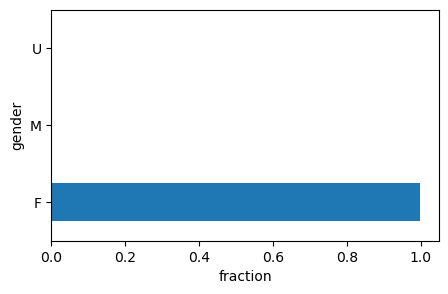

In [32]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['gender'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

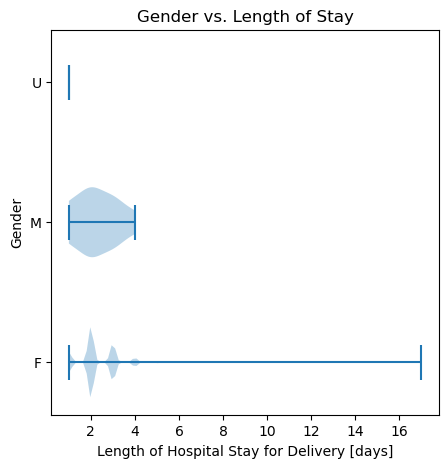

In [33]:
non_na = all_visits.dropna(subset='gender')
labels = all_visits['gender'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['gender']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Gender')
plt.title('Gender vs. Length of Stay')
plt.show()

In [34]:
#all_visits[all_visits['gender']=='M']

#### race

In [62]:
len(all_visits['race'].unique())

4

In [35]:
pd.value_counts(all_visits['race'])

race
White                     9878
Other Race                6507
Black/African American    2186
Multi-racial               233
Name: count, dtype: int64

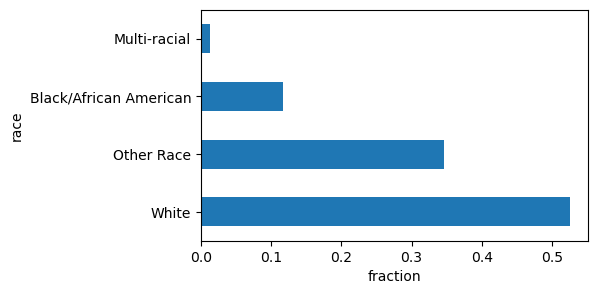

In [36]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['race'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

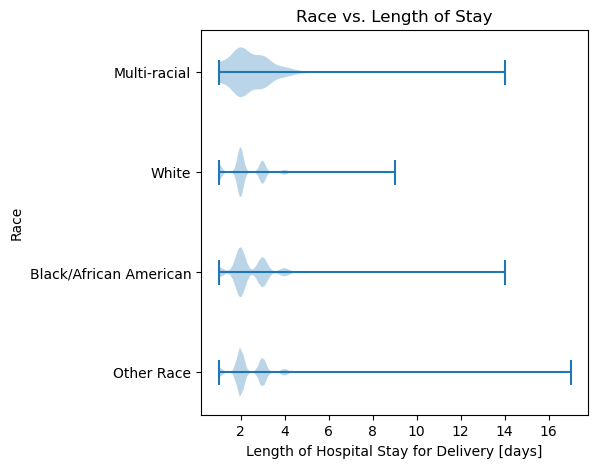

In [37]:
non_na = all_visits.dropna(subset='race')
labels = all_visits['race'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['race']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Race')
plt.title('Race vs. Length of Stay')
plt.show()

In [38]:
all_visits[all_visits['race']=='Multi-racial']['length_of_stay'].unique()

array([ 1,  3,  2,  4,  6, 14,  5])

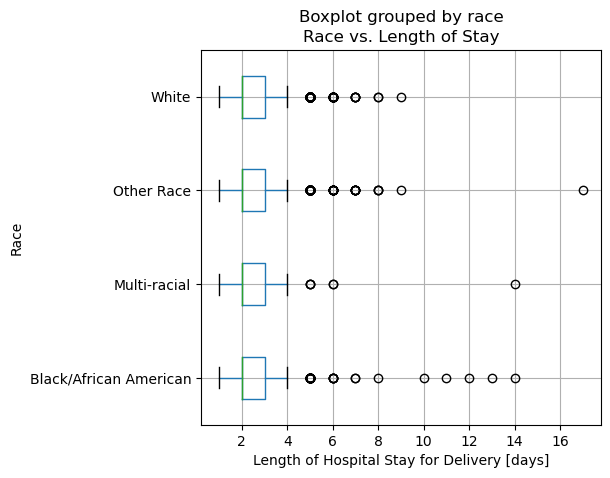

In [39]:
non_na = all_visits.dropna(subset='race')
non_na[['race', 'length_of_stay']].boxplot(by='race', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Race')
plt.title('Race vs. Length of Stay')
plt.show()

#### ethnicity

In [63]:
len(all_visits['ethnicity'].unique())

4

In [40]:
pd.value_counts(all_visits['ethnicity'])

ethnicity
Not Span/Hispanic    13621
Spanish/Hispanic      3507
Unknown               1655
Multi-ethnic            21
Name: count, dtype: int64

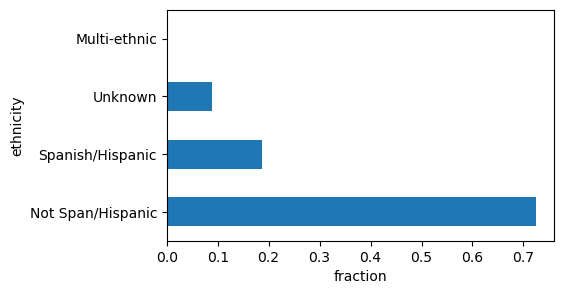

In [41]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['ethnicity'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

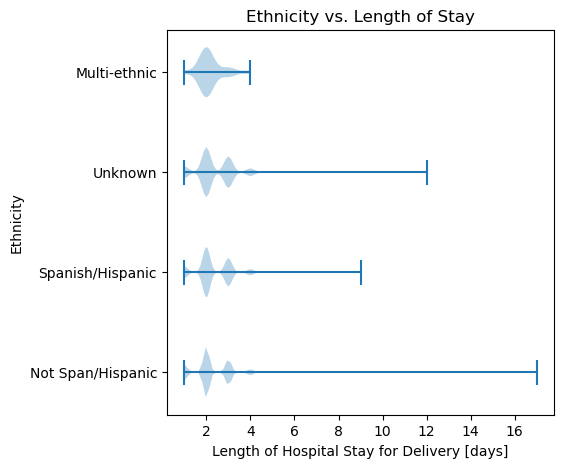

In [42]:
non_na = all_visits.dropna(subset='ethnicity')
labels = all_visits['ethnicity'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['ethnicity']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Ethnicity')
plt.title('Ethnicity vs. Length of Stay')
plt.show()

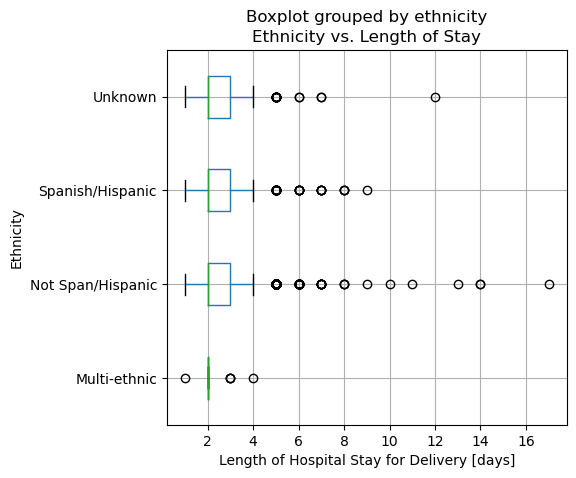

In [43]:
non_na = all_visits.dropna(subset='ethnicity')
non_na[['ethnicity', 'length_of_stay']].boxplot(by='ethnicity', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Ethnicity')
plt.title('Ethnicity vs. Length of Stay')
plt.show()

#### payment_typology_1

In [64]:
len(all_visits['payment_typology_1'].unique())

8

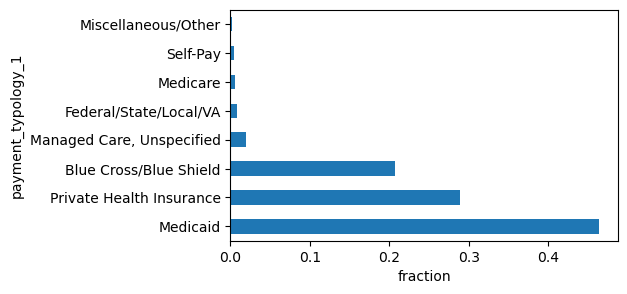

In [44]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['payment_typology_1'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

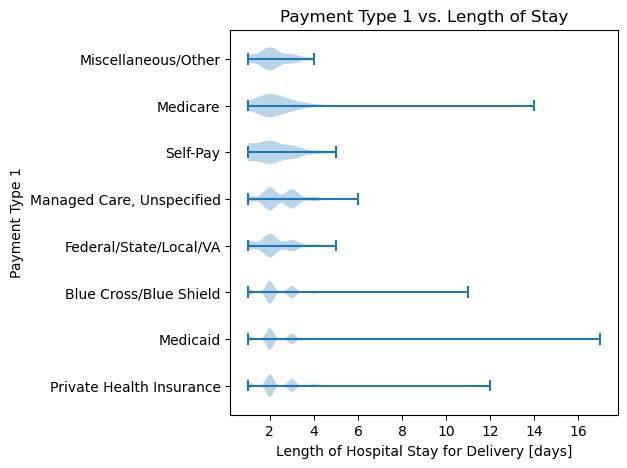

In [45]:
non_na = all_visits.dropna(subset='payment_typology_1')
labels = all_visits['payment_typology_1'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['payment_typology_1']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 1')
plt.title('Payment Type 1 vs. Length of Stay')
plt.show()

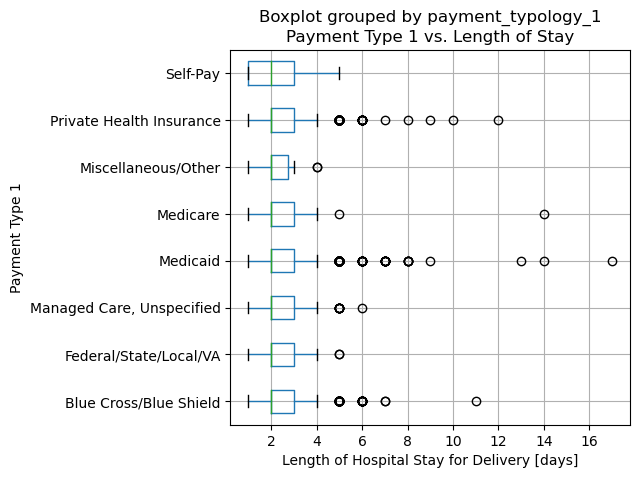

In [46]:
non_na = all_visits.dropna(subset='payment_typology_1')
non_na[['payment_typology_1', 'length_of_stay']].boxplot(by='payment_typology_1', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 1')
plt.title('Payment Type 1 vs. Length of Stay')
plt.show()

#### payment_typology_2

In [65]:
len(all_visits['payment_typology_2'].unique())

9

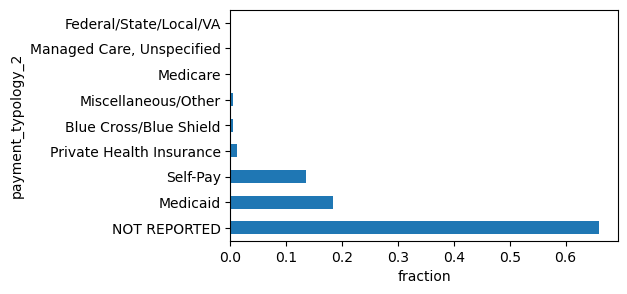

In [47]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['payment_typology_2'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

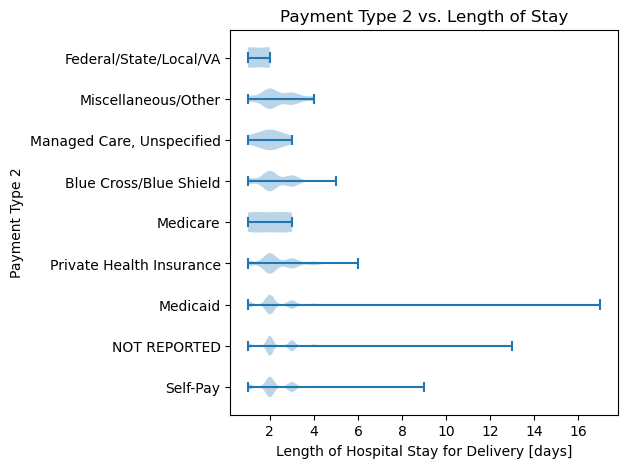

In [48]:
non_na = all_visits.dropna(subset='payment_typology_2')
labels = non_na['payment_typology_2'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['payment_typology_2']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 2')
plt.title('Payment Type 2 vs. Length of Stay')
plt.show()

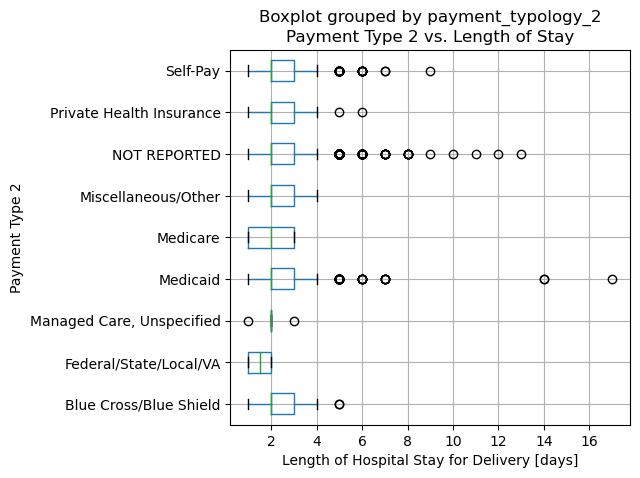

In [49]:
non_na = all_visits.dropna(subset='payment_typology_2')
non_na[['payment_typology_2', 'length_of_stay']].boxplot(by='payment_typology_2', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 2')
plt.title('Payment Type 2 vs. Length of Stay')
plt.show()

#### payment_typology_3

In [66]:
len(all_visits['payment_typology_3'].unique())

6

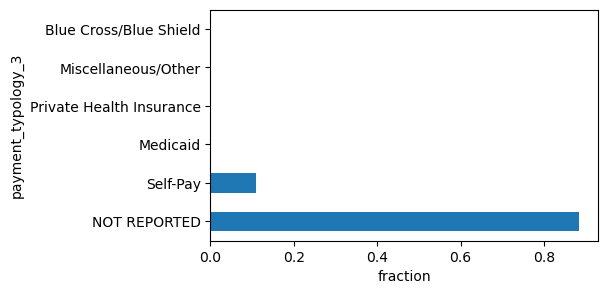

In [50]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['payment_typology_3'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

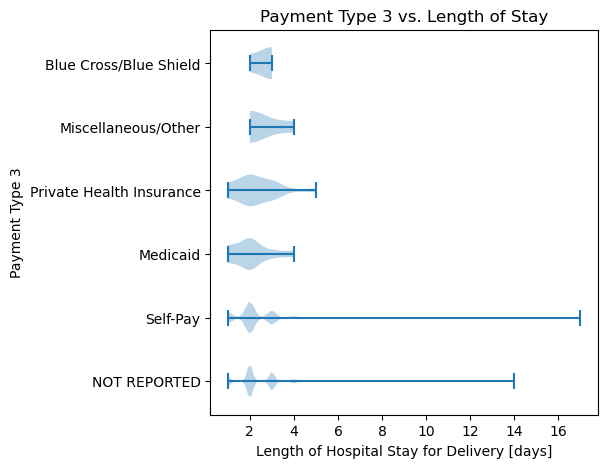

In [51]:
non_na = all_visits.dropna(subset='payment_typology_3')
labels = non_na['payment_typology_3'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['payment_typology_3']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 3')
plt.title('Payment Type 3 vs. Length of Stay')
plt.show()

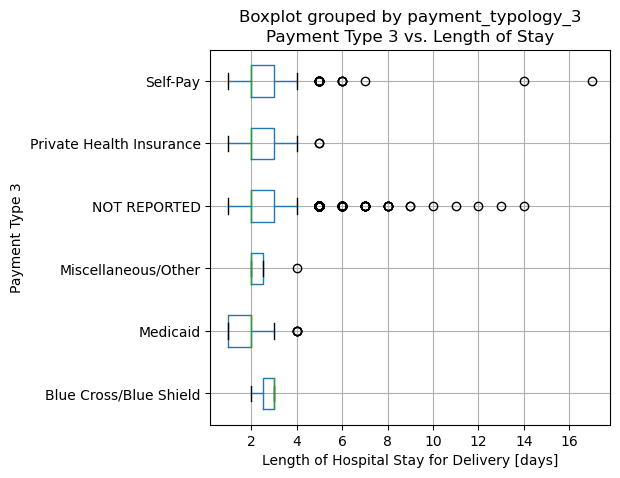

In [52]:
non_na = all_visits.dropna(subset='payment_typology_3')
non_na[['payment_typology_3', 'length_of_stay']].boxplot(by='payment_typology_3', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 3')
plt.title('Payment Type 3 vs. Length of Stay')
plt.show()

## Correlations Between Features

So far, I only know how to do this with pearson correlation matricies from PS4, but that only works with continuous features.

In [53]:
# corr_matrix = all_visits_with_nans.loc[:, all_visits_with_nans.columns != 'length_of_stay'].corr(method='pearson')

# plt.figure(figsize=(5, 5))
# plt.imshow(corr_matrix, origin='lower', vmin=-1, vmax=1)
# plt.xlabel('Features')
# plt.ylabel('Features')
# plt.title('Pearson Correlation Between Features')
# plt.xticks(ticks=range(0, len(corr_matrix.columns)), labels=corr_matrix.columns)
# plt.yticks(ticks=range(0, len(corr_matrix.columns)), labels=corr_matrix.columns)
# plt.colorbar(label='Pearson (Standard) Correlation Coefficient')
# plt.show()